In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
plt.rcParams['figure.figsize'] = [20, 20]


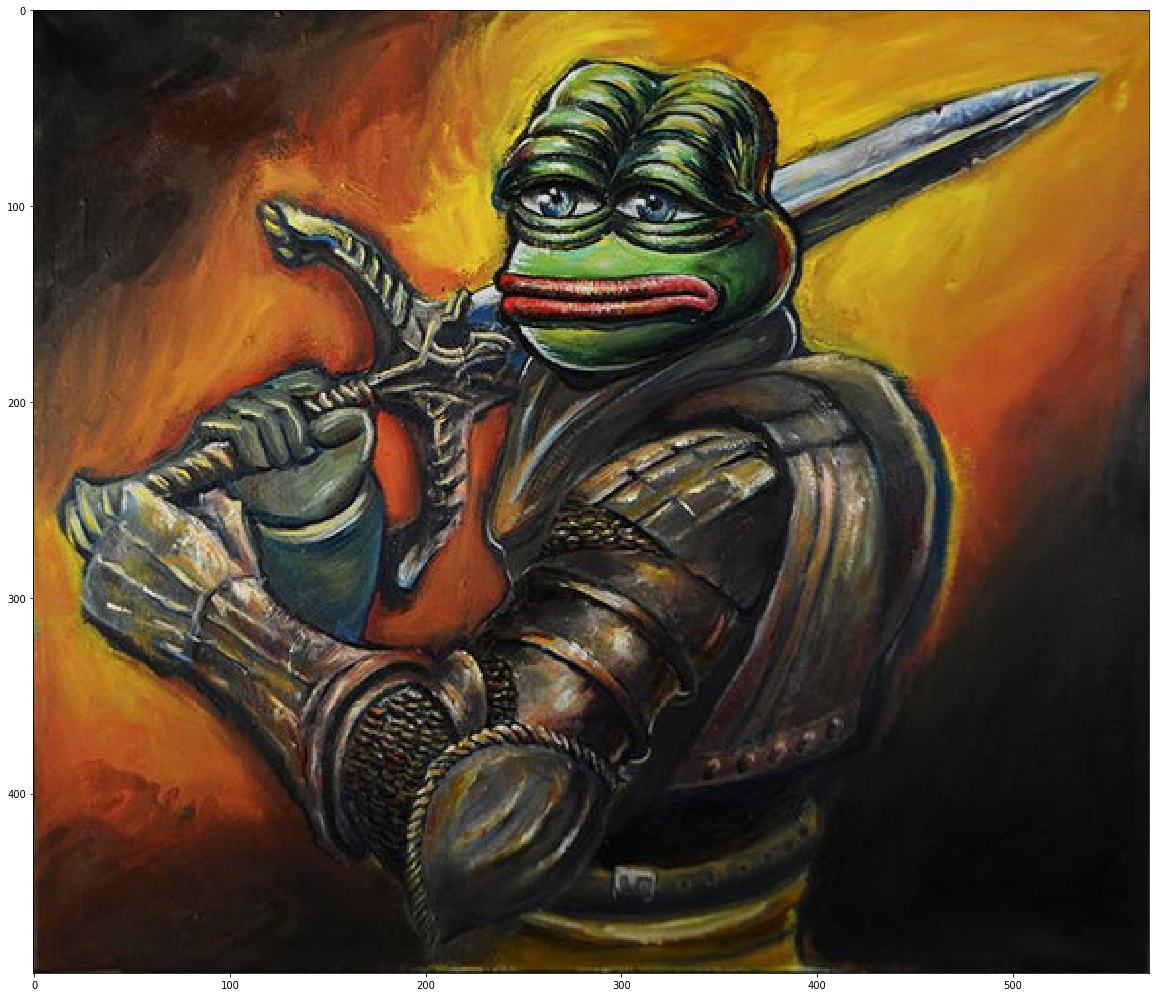

In [3]:
# Ładowanie obrazka 
img = mpimg.imread('il_570xN.1831521542_ppza.png')


imgplot = plt.imshow(img)


# Zmiana wymiaru i przekształcanie obrazka pod PCA.

In [4]:
print(f'Przed przekszałceniem:{img.shape}')

# Przekształcanie obrazka

img_reshape =np.reshape(img, (img.shape[1],img.shape[2]*img.shape[0]))
print(f'Po przekszałceniu:{img_reshape.shape}')

# Przygotowane przekształcenia odwrotnego

def revers(img):
    return np.reshape(img,(492,570,3))

Przed przekszałceniem:(492, 570, 3)
Po przekszałceniem:(570, 1476)


# Wykorzystanie PCA 

Pierwsza próba z ustaloną wyjaśnioną wariancją.

In [5]:
pca = PCA(0.99)

# kompresja 
compresed_img = pca.fit_transform(img_reshape)

In [6]:
# Porównanie wymiarów 
print(f'Przed kompresją:{img_reshape.shape}')
print(f'Po kompresji:{compresed_img.shape}')
# Rozmiar zmniejszył się prawie sześciokrotnie 

Przed kompresją:(570, 1476)
Po kompresji:(570, 250)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


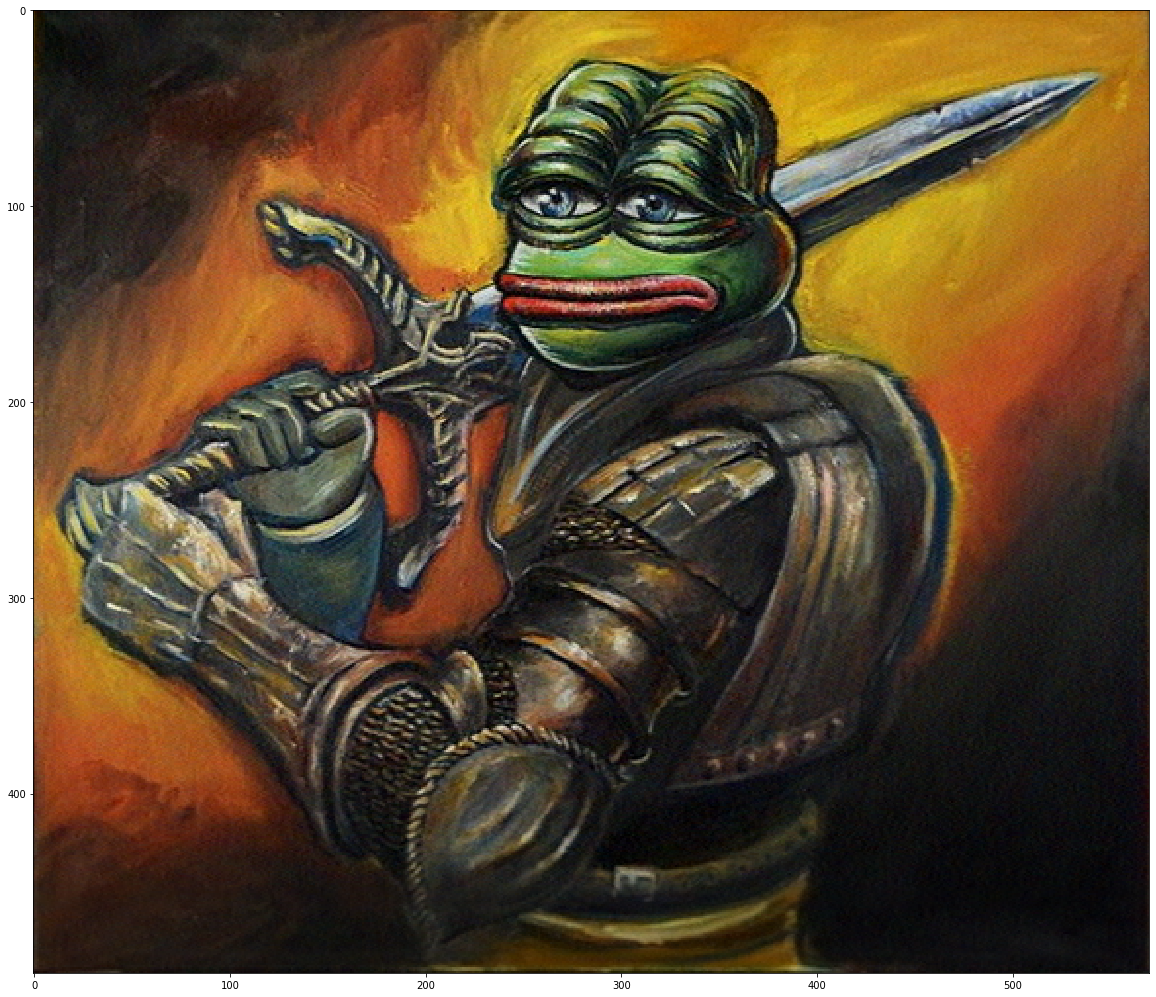

In [7]:
# Sprawdźmy jeszcze jakie straty przyniosła kompresja
plt.imshow(revers(pca.inverse_transform(compresed_img)))
# Obrazek może miejscami wydawać się nieco bardziej rozmyty, ale w praktyce nie widać żadnych różnic.

Pokazałem, że PCA radzi sobie dobrze z kompresją obrazka. Teraz spróbuje dokładniej zbadać temat.

In [8]:
# Funckja rysująca 
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random

def series(Variance):
    pca=PCA(Variance/100)
    img_comp = pca.fit_transform(img_reshape)
    
    plt.suptitle("Size reduced " + str(round(img_reshape.shape[1]/img_comp.shape[1],2))  +  " times", fontsize=14)
    plt.subplot(2, 2, 1)
    plt.imshow(revers(pca.inverse_transform(img_comp)))
    plt.title('Obrazek po kompresji')


    plt.subplot(2, 2, 2)
    plt.imshow(img)
    plt.title('Obrazek oryginalny')
    
    
    return()
interact(series, Variance=(1,100,1));
 

interactive(children=(IntSlider(value=50, description='Variance', min=1), Output()), _dom_classes=('widget-int…

Użyta funkcja do prezentacji wyników powoduje pewne problemy. Dobrze jednak prezentuje wyniki. Przy wyjaśnionej wariancji na poziomie dziewięćdziesięciu kilku procent obrazek jest czytelny, a wymiar zmniejsza się kilkanaście razy.

# Dodanie standaryzacji

In [9]:
# Funkcja taka sama jak poprzednio, ale dane są standaryzowane.


def series1(Variance):
    pca=PCA(Variance/100)
    scaler = StandardScaler()
    img_reshape_n = scaler.fit_transform(img_reshape)
    img_comp = pca.fit_transform(img_reshape_n)
    
    plt.suptitle("Size reduced " + str(round(img_reshape.shape[1]/img_comp.shape[1],2))  +  " times", fontsize=14)
    plt.subplot(2, 2, 1)
    plt.imshow(revers(scaler.inverse_transform(pca.inverse_transform(img_comp))))
    plt.title('Obrazek po kompresji')


    plt.subplot(2, 2, 2)
    plt.imshow(img)
    plt.title('Obrazek originalny')
    
    
    return()
interact(series1, Variance=(1,100,1));

interactive(children=(IntSlider(value=50, description='Variance', min=1), Output()), _dom_classes=('widget-int…

Ocena czy standaryzacja poprawiła wyniki, nie jest prosta. Wydaje się jednak, że obrazki są nieznacznie wyraźniejsze i lepiej spakowane niż w przypadku poprzednim.\
Ostatecznie PCA okazało się bardzo dobrym narzędziem do kompresji obrazków. Uzyskała prawie 6 -krotne zmniejszenie rozmiaru zupełnie bez strat jakości. A przy 20 - krotnej kompresji obrazek nadal jest czytelny.

# Bonus 

In [4]:
# Wczytywanie pliku 
from pandas import DataFrame

signal = pd.read_csv("signals.tsv", sep="\t")

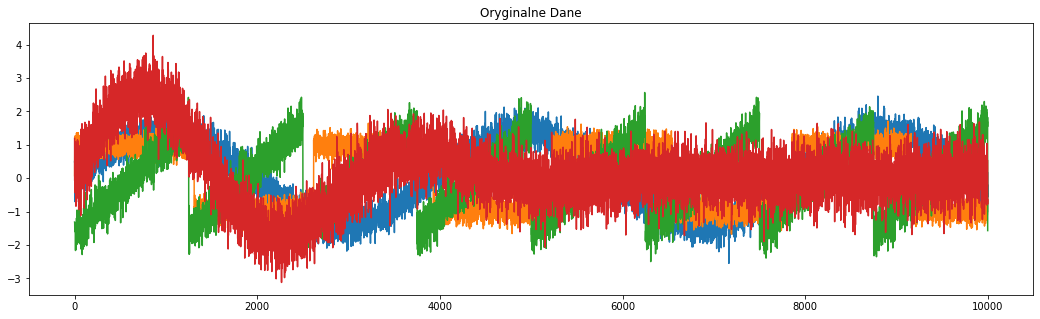

In [36]:
# Prezenatacja otrzymanych danych 
fig, ax = plt.subplots(figsize=(18,5))

plt.title("Oryginalne Dane")
ax.plot(signal.time,signal.signal1)
ax.plot(signal.time,signal.signal2)
ax.plot(signal.time,signal.signal3)
ax.plot(signal.time,signal.signal4)


plt.show()

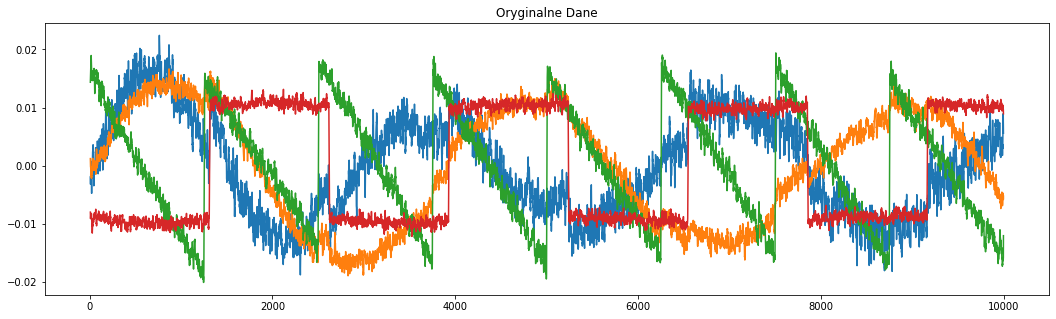

In [6]:
# Przetwarzanie danych 
from sklearn.decomposition import FastICA 

# Wykorzystanie ICA 
ica = FastICA(n_components=4,random_state=123)
Siglan_transform = ica.fit_transform(signal.drop('time',axis=1))  
mixing_matrix = ica.mixing_ 

# 


# Przygotowanie danych pod wykres i zmniejszanie szumu 
previus_signals = pd.DataFrame(Siglan_transform).rolling(window=8).mean()
previus_signals['time'] = signal.time

previus_signals.columns = ['signal1','signal2','signal3','signal4','time']
# Wykres przetworzonych danych
fig, ax = plt.subplots(figsize=(18,5))

plt.title("Oryginalne Dane")
ax.plot(previus_signals.time,previus_signals.signal1)
ax.plot(previus_signals.time,previus_signals.signal2)
ax.plot(previus_signals.time,previus_signals.signal3)
ax.plot(previus_signals.time,previus_signals.signal4)


plt.show()

Algorytm IPC sprawdził się jako narzędzie do znalezienia pierwotnych sygnałów. Użycie średniej ruchomej ma na celu redukcję szumów.